## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3        X4            Y
0  33.355936  1610.703044  0.694556  7.624246  1119.216257
1  89.139673  1724.608815  0.318564  6.305596   556.763105
2  68.324494  1206.346662  0.098704  6.443104   137.256922
3  29.449720  1676.646481  0.306596  7.351548   514.897868
4   3.854680  1382.054473  0.027409  2.278800    38.206161


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0207877	total: 64.6ms	remaining: 1m 4s
1:	learn: 1.0089591	total: 65.2ms	remaining: 32.5s
2:	learn: 0.9978682	total: 65.7ms	remaining: 21.8s
3:	learn: 0.9869314	total: 66.2ms	remaining: 16.5s
4:	learn: 0.9730675	total: 67.7ms	remaining: 13.5s
5:	learn: 0.9603198	total: 68.2ms	remaining: 11.3s
6:	learn: 0.9471976	total: 68.6ms	remaining: 9.73s
7:	learn: 0.9353356	total: 69.1ms	remaining: 8.57s
8:	learn: 0.9229718	total: 69.6ms	remaining: 7.66s
9:	learn: 0.9095725	total: 70ms	remaining: 6.93s
10:	learn: 0.8977634	total: 70.5ms	remaining: 6.33s
11:	learn: 0.8844688	total: 70.9ms	remaining: 5.84s
12:	learn: 0.8715142	total: 71.4ms	remaining: 5.42s
13:	learn: 0.8588924	total: 71.9ms	remaining: 5.06s
14:	learn: 0.8465250	total: 72.3ms	remaining: 4.75s
15:	learn: 0.8365606	total: 72.8ms	remaining: 4.48s
16:	learn: 0.8247238	total: 73.3ms	remaining: 4.24s
17:	learn: 0.8129863	total: 73.6ms	remaining: 4.02s
18:	learn: 0.8039138	total: 74.1ms	remaining: 

104:	learn: 0.2838852	total: 109ms	remaining: 927ms
105:	learn: 0.2807856	total: 109ms	remaining: 922ms
106:	learn: 0.2773241	total: 110ms	remaining: 915ms
107:	learn: 0.2746031	total: 110ms	remaining: 909ms
108:	learn: 0.2717434	total: 110ms	remaining: 903ms
109:	learn: 0.2687601	total: 111ms	remaining: 896ms
110:	learn: 0.2661303	total: 111ms	remaining: 890ms
111:	learn: 0.2635449	total: 111ms	remaining: 884ms
112:	learn: 0.2606733	total: 112ms	remaining: 877ms
113:	learn: 0.2574985	total: 112ms	remaining: 871ms
114:	learn: 0.2546844	total: 112ms	remaining: 866ms
115:	learn: 0.2518659	total: 113ms	remaining: 860ms
116:	learn: 0.2491738	total: 113ms	remaining: 856ms
117:	learn: 0.2467109	total: 114ms	remaining: 851ms
118:	learn: 0.2440816	total: 114ms	remaining: 846ms
119:	learn: 0.2419100	total: 115ms	remaining: 841ms
120:	learn: 0.2396657	total: 115ms	remaining: 837ms
121:	learn: 0.2376998	total: 116ms	remaining: 832ms
122:	learn: 0.2346164	total: 116ms	remaining: 828ms
123:	learn: 

284:	learn: 0.0725995	total: 186ms	remaining: 467ms
285:	learn: 0.0723601	total: 187ms	remaining: 466ms
286:	learn: 0.0721981	total: 187ms	remaining: 465ms
287:	learn: 0.0719695	total: 187ms	remaining: 463ms
288:	learn: 0.0715203	total: 188ms	remaining: 462ms
289:	learn: 0.0713822	total: 189ms	remaining: 462ms
290:	learn: 0.0709799	total: 189ms	remaining: 461ms
291:	learn: 0.0707306	total: 190ms	remaining: 460ms
292:	learn: 0.0705103	total: 190ms	remaining: 459ms
293:	learn: 0.0702795	total: 191ms	remaining: 458ms
294:	learn: 0.0700522	total: 191ms	remaining: 457ms
295:	learn: 0.0697271	total: 192ms	remaining: 456ms
296:	learn: 0.0693318	total: 192ms	remaining: 454ms
297:	learn: 0.0690395	total: 192ms	remaining: 453ms
298:	learn: 0.0686525	total: 193ms	remaining: 452ms
299:	learn: 0.0685099	total: 193ms	remaining: 451ms
300:	learn: 0.0683624	total: 194ms	remaining: 450ms
301:	learn: 0.0680371	total: 194ms	remaining: 448ms
302:	learn: 0.0678483	total: 194ms	remaining: 447ms
303:	learn: 

522:	learn: 0.0278325	total: 291ms	remaining: 265ms
523:	learn: 0.0276645	total: 291ms	remaining: 265ms
524:	learn: 0.0275495	total: 292ms	remaining: 264ms
525:	learn: 0.0273847	total: 292ms	remaining: 263ms
526:	learn: 0.0272224	total: 293ms	remaining: 263ms
527:	learn: 0.0271107	total: 293ms	remaining: 262ms
528:	learn: 0.0269516	total: 293ms	remaining: 261ms
529:	learn: 0.0267950	total: 294ms	remaining: 261ms
530:	learn: 0.0266171	total: 295ms	remaining: 260ms
531:	learn: 0.0264429	total: 295ms	remaining: 259ms
532:	learn: 0.0262926	total: 295ms	remaining: 259ms
533:	learn: 0.0261979	total: 296ms	remaining: 258ms
534:	learn: 0.0260110	total: 296ms	remaining: 257ms
535:	learn: 0.0259078	total: 296ms	remaining: 257ms
536:	learn: 0.0257225	total: 297ms	remaining: 256ms
537:	learn: 0.0256139	total: 297ms	remaining: 255ms
538:	learn: 0.0254709	total: 297ms	remaining: 254ms
539:	learn: 0.0252919	total: 298ms	remaining: 254ms
540:	learn: 0.0251189	total: 298ms	remaining: 253ms
541:	learn: 

705:	learn: 0.0116954	total: 368ms	remaining: 153ms
706:	learn: 0.0116534	total: 368ms	remaining: 153ms
707:	learn: 0.0115946	total: 369ms	remaining: 152ms
708:	learn: 0.0115604	total: 369ms	remaining: 151ms
709:	learn: 0.0115008	total: 369ms	remaining: 151ms
710:	learn: 0.0114602	total: 370ms	remaining: 150ms
711:	learn: 0.0114267	total: 370ms	remaining: 150ms
712:	learn: 0.0113721	total: 370ms	remaining: 149ms
713:	learn: 0.0113162	total: 371ms	remaining: 149ms
714:	learn: 0.0112640	total: 371ms	remaining: 148ms
715:	learn: 0.0112095	total: 372ms	remaining: 147ms
716:	learn: 0.0111669	total: 372ms	remaining: 147ms
717:	learn: 0.0111250	total: 372ms	remaining: 146ms
718:	learn: 0.0110838	total: 373ms	remaining: 146ms
719:	learn: 0.0110433	total: 373ms	remaining: 145ms
720:	learn: 0.0110035	total: 374ms	remaining: 145ms
721:	learn: 0.0109409	total: 374ms	remaining: 144ms
722:	learn: 0.0109031	total: 374ms	remaining: 143ms
723:	learn: 0.0108658	total: 375ms	remaining: 143ms
724:	learn: 

951:	learn: 0.0049130	total: 472ms	remaining: 23.8ms
952:	learn: 0.0048926	total: 473ms	remaining: 23.3ms
953:	learn: 0.0048700	total: 473ms	remaining: 22.8ms
954:	learn: 0.0048509	total: 474ms	remaining: 22.3ms
955:	learn: 0.0048434	total: 474ms	remaining: 21.8ms
956:	learn: 0.0048227	total: 474ms	remaining: 21.3ms
957:	learn: 0.0048063	total: 475ms	remaining: 20.8ms
958:	learn: 0.0047885	total: 475ms	remaining: 20.3ms
959:	learn: 0.0047725	total: 476ms	remaining: 19.8ms
960:	learn: 0.0047655	total: 476ms	remaining: 19.3ms
961:	learn: 0.0047536	total: 476ms	remaining: 18.8ms
962:	learn: 0.0047326	total: 477ms	remaining: 18.3ms
963:	learn: 0.0047232	total: 477ms	remaining: 17.8ms
964:	learn: 0.0047160	total: 478ms	remaining: 17.3ms
965:	learn: 0.0046987	total: 478ms	remaining: 16.8ms
966:	learn: 0.0046830	total: 479ms	remaining: 16.3ms
967:	learn: 0.0046675	total: 479ms	remaining: 15.8ms
968:	learn: 0.0046604	total: 479ms	remaining: 15.3ms
969:	learn: 0.0046428	total: 480ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

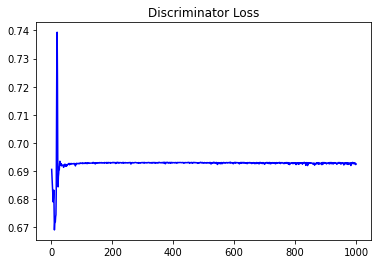

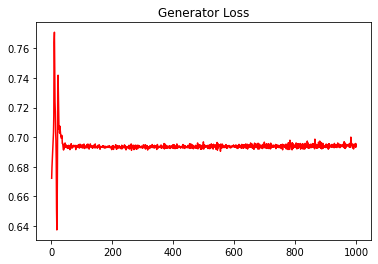

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.008665352378381053


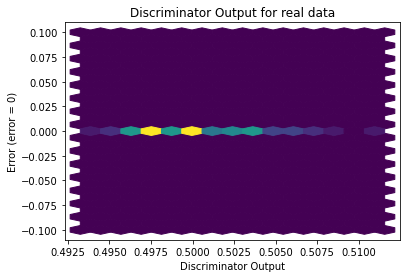

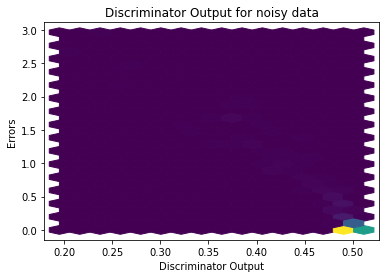

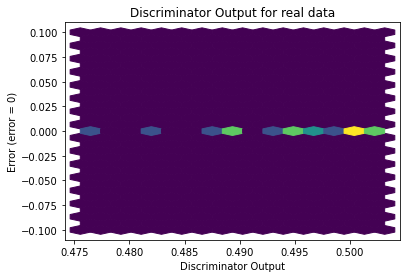

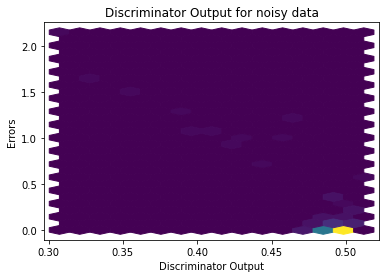

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


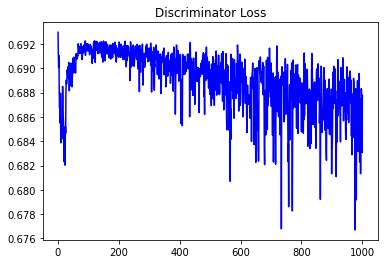

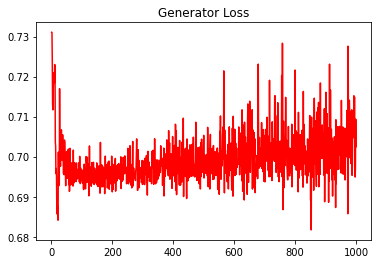

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.017603840510049536


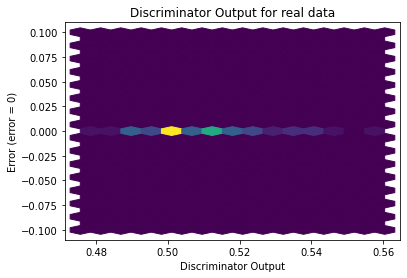

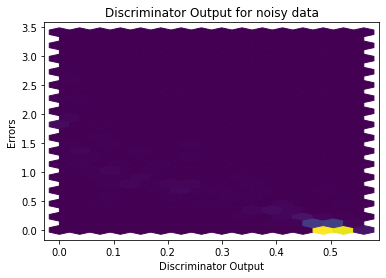

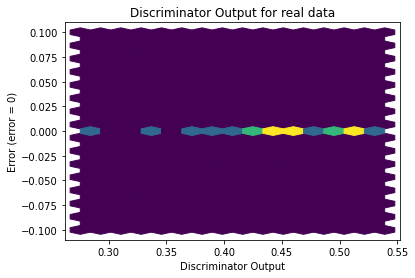

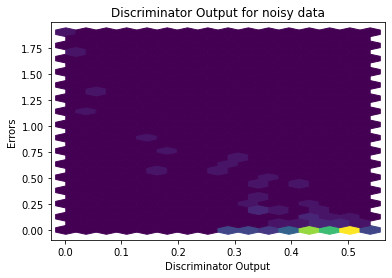

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1009]], requires_grad=True)
